In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/2022dataset/subset_5k.csv'

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
data_update = pd.read_csv(file_path)
data_update

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Texas,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.68,113.40,40.35,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
1,Wisconsin,Female,Good,2.0,5.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,...,1.73,104.33,34.97,Yes,Yes,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
2,Idaho,Male,Poor,7.0,10.0,Within past year (anytime less than 12 months ...,Yes,6.0,1 to 5,No,...,1.73,104.33,34.97,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
3,Iowa,Female,Good,20.0,10.0,Within past year (anytime less than 12 months ...,No,8.0,All,Yes,...,1.68,127.01,45.19,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
4,South Dakota,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.60,49.90,19.49,Yes,No,Yes,No,"Yes, received Tdap",No,Tested positive using home test without a heal...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,North Dakota,Male,Good,0.0,2.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.83,104.33,31.19,Yes,Yes,Yes,Yes,"Yes, received Tdap",No,Yes
4996,New York,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.60,63.50,24.80,Yes,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
4997,Washington,Male,Good,30.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,7.0,1 to 5,No,...,1.88,157.85,44.68,Yes,No,No,No,"Yes, received Tdap",No,No
4998,New York,Female,Very good,3.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,49.90,17.23,Yes,Yes,No,No,"Yes, received tetanus shot but not sure what type",No,Yes


In [ ]:
data_update.duplicated().sum()

0

In [ ]:
duplicate_obs = data_update[data_update.duplicated(keep=False)]
duplicate_obs

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos


In [ ]:
data_copy = data_update.copy()
data_copy = data_update.drop_duplicates()

In [ ]:
data_copy['HeartConditionBinary'] = ((data_copy['HadHeartAttack'] == 'Yes') | (data_copy['HadAngina'] == 'Yes')).astype(int)
data_copy

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeartConditionBinary
0,Texas,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,113.40,40.35,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,0
1,Wisconsin,Female,Good,2.0,5.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,...,104.33,34.97,Yes,Yes,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No,0
2,Idaho,Male,Poor,7.0,10.0,Within past year (anytime less than 12 months ...,Yes,6.0,1 to 5,No,...,104.33,34.97,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,1
3,Iowa,Female,Good,20.0,10.0,Within past year (anytime less than 12 months ...,No,8.0,All,Yes,...,127.01,45.19,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,1
4,South Dakota,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,49.90,19.49,Yes,No,Yes,No,"Yes, received Tdap",No,Tested positive using home test without a heal...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,North Dakota,Male,Good,0.0,2.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,104.33,31.19,Yes,Yes,Yes,Yes,"Yes, received Tdap",No,Yes,0
4996,New York,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,63.50,24.80,Yes,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No,0
4997,Washington,Male,Good,30.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,7.0,1 to 5,No,...,157.85,44.68,Yes,No,No,No,"Yes, received Tdap",No,No,0
4998,New York,Female,Very good,3.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,49.90,17.23,Yes,Yes,No,No,"Yes, received tetanus shot but not sure what type",No,Yes,0


In [ ]:
data_copy = data_copy.drop(['HadHeartAttack','HadAngina'],axis=1)

In [ ]:
data_copy['HeartConditionBinary'] = data_copy['HeartConditionBinary'].astype('category')
data_copy['Sex'] = data_copy['Sex'].astype('category')

In [ ]:
numerical_cols = data_copy.select_dtypes(include=['float64','number']).columns
numerical_data = data_copy[numerical_cols]
numerical_data

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
0,0.0,0.0,8.0,1.68,113.40,40.35
1,2.0,5.0,8.0,1.73,104.33,34.97
2,7.0,10.0,6.0,1.73,104.33,34.97
3,20.0,10.0,8.0,1.68,127.01,45.19
4,0.0,0.0,7.0,1.60,49.90,19.49
...,...,...,...,...,...,...
4995,0.0,2.0,6.0,1.83,104.33,31.19
4996,0.0,0.0,7.0,1.60,63.50,24.80
4997,30.0,0.0,7.0,1.88,157.85,44.68
4998,3.0,2.0,7.0,1.70,49.90,17.23


In [ ]:
categorical_cols = data_copy.select_dtypes(include=['object','category']).columns

In [ ]:
len(categorical_cols)

33

In [ ]:
data_copy1 = data_copy.copy()
data_copy2 = data_copy.copy()

In [ ]:
nominal_features = ['State', 'RaceEthnicityCategory', 'TetanusLast10Tdap', 'CovidPos','RemovedTeeth','SmokerStatus','ECigaretteUsage','HadDiabetes']
binary_features = [
     'HadStroke', 'HadAsthma', 'HadSkinCancer',
    'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
    'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating',
    'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
    'PhysicalActivities', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
    'PneumoVaxEver', 'HighRiskLastYear', 'ChestScan'
]
ordinal_features = ['GeneralHealth', 'LastCheckupTime', 'AgeCategory']

In [ ]:
data_copy1['Sex'] = data_copy1['Sex'].replace({'Male':1,'Female':0})
data_copy2['Sex'] = data_copy2['Sex'].replace({'Male':1,'Female':0})

<ipython-input-17-f4cdbb289452>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy1['Sex'] = data_copy1['Sex'].replace({'Male':1,'Female':0})
<ipython-input-17-f4cdbb289452>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_copy1['Sex'] = data_copy1['Sex'].replace({'Male':1,'Female':0})
<ipython-input-17-f4cdbb289452>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, 

In [ ]:
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
nominal_encoded = pd.DataFrame(
    one_hot_encoder.fit_transform(data_copy1[nominal_features]),
    columns=one_hot_encoder.get_feature_names_out(nominal_features),
    index=data_copy1.index  # Align indices with the original DataFrame
)

binary_encoded = data_copy1[binary_features].replace({'Yes': 1, 'No': 0}).astype(int)


ordinal_mappings = {
    'GeneralHealth': ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'],
    'LastCheckupTime': [
        '5 or more years ago',
        'Within past 5 years (2 years but less than 5 years ago)',
        'Within past 2 years (1 year but less than 2 years ago)',
        'Within past year (anytime less than 12 months ago)'
    ],
    'AgeCategory':[
        'Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59','Age 60 to 64', 'Age 65 to 69'
         ,'Age 70 to 74','Age 75 to 79','Age 80 or older'
    ]
}

ordinal_encoded = data_copy1[ordinal_features].replace({
    col: {val: i for i, val in enumerate(vals)} for col, vals in ordinal_mappings.items()
})

<ipython-input-18-2b01ca78c0a6>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  binary_encoded = data_copy1[binary_features].replace({'Yes': 1, 'No': 0}).astype(int)
<ipython-input-18-2b01ca78c0a6>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ordinal_encoded = data_copy1[ordinal_features].replace({


In [ ]:
processed_data1 = pd.concat([nominal_encoded, binary_encoded, ordinal_encoded,numerical_data], axis=1)
processed_data1['HeartConditionBinary'] = data_copy1['HeartConditionBinary'].values

In [ ]:
processed_data1['HeartConditionBinary'] = processed_data1['HeartConditionBinary'].astype('category')
#processed_data1['Sex'] = processed_data1['Sex'].astype('category')

#MLP

In [ ]:
X1 = processed_data1.drop(columns=['HeartConditionBinary'])
y1 = processed_data1['HeartConditionBinary']

# Split into train, validation, and test sets (70% train, 15% validation, 15% test)
X1_train, X1_temp, y1_train, y1_temp = train_test_split(X1, y1, test_size=0.3, random_state=10)
X1_valid, X1_test, y1_valid, y1_test = train_test_split(X1_temp, y1_temp, test_size=0.5, random_state=10)

In [ ]:
X1_train.columns = X1_train.columns.str.replace(r'[^A-Za-z0-9_]', '_', regex=True)
X1_test.columns = X1_test.columns.str.replace(r'[^A-Za-z0-9_]', '_', regex=True)
X1_valid.columns = X1_valid.columns.str.replace(r'[^A-Za-z0-9_]', '_', regex=True)

In [ ]:
print(X1_train.columns)

Index(['State_Alabama', 'State_Alaska', 'State_Arizona', 'State_Arkansas',
       'State_California', 'State_Colorado', 'State_Connecticut',
       'State_Delaware', 'State_District_of_Columbia', 'State_Florida',
       ...
       'ChestScan', 'GeneralHealth', 'LastCheckupTime', 'AgeCategory',
       'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'HeightInMeters', 'WeightInKilograms', 'BMI'],
      dtype='object', length=111)


In [ ]:
scaler = StandardScaler()

X1_train[numerical_cols] = scaler.fit_transform(X1_train[numerical_cols])
X1_test[numerical_cols] = scaler.transform(X1_test[numerical_cols])
X1_valid[numerical_cols] = scaler.transform(X1_valid[numerical_cols])

In [ ]:
from sklearn.datasets import make_classification
from collections import Counter

In [ ]:
class_counts_train = Counter(y1_train)
y1_train_0 = class_counts_train[0]
y1_train_1 = class_counts_train[1]

print(f"Class 0 count train: {y1_train_0}")
print(f"Class 1 count train: {y1_train_1}")


class_counts_test = Counter(y1_test)
y1_test_0 = class_counts_test[0]
y1_test_1 = class_counts_test[1]

print(f"Class 0 count test: {y1_test_0}")
print(f"Class 1 count test: {y1_test_1}")

class_counts_valid = Counter(y1_valid)
y1_valid_0 = class_counts_test[0]
y1_valid_1 = class_counts_test[1]

print(f"Class 0 count test: {y1_valid_0}")
print(f"Class 1 count test: {y1_valid_1}")

Class 0 count train: 3185
Class 1 count train: 315
Class 0 count test: 673
Class 1 count test: 77
Class 0 count test: 673
Class 1 count test: 77


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=10)
Xs_train, ys_train = smote.fit_resample(X1_train, y1_train)

print("After SMOTE with Tomek Links:")
print("Original class distribution:", Counter(y1_train))
print("Resampled class distribution:", Counter(ys_train))

After SMOTE with Tomek Links:
Original class distribution: Counter({0: 3185, 1: 315})
Resampled class distribution: Counter({0: 3185, 1: 3185})


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
X1_train_tensor = torch.tensor(Xs_train.values, dtype=torch.float32)
y1_train_tensor = torch.tensor(ys_train.values, dtype=torch.float32).view(-1, 1)

X1_valid_tensor = torch.tensor(X1_valid.values, dtype=torch.float32)
y1_valid_tensor = torch.tensor(y1_valid.values, dtype=torch.float32).view(-1, 1)

X1_test_tensor = torch.tensor(X1_test.values, dtype=torch.float32)
y1_test_tensor = torch.tensor(y1_test.values, dtype=torch.float32).view(-1, 1)

# Check the shapes of the splits
print(f"Training Data: {X1_train_tensor.shape}, Validation Data: {X1_valid_tensor.shape}, Test Data: {X1_test_tensor.shape}")

Training Data: torch.Size([6370, 111]), Validation Data: torch.Size([750, 111]), Test Data: torch.Size([750, 111])


Epoch [5/60], Loss: 0.1864, Training Accuracy: 0.7009
Epoch [10/60], Loss: 0.0817, Training Accuracy: 0.7710
Epoch [15/60], Loss: 0.1346, Training Accuracy: 0.8110
Epoch [20/60], Loss: 0.0659, Training Accuracy: 0.8498
Epoch [25/60], Loss: 0.0556, Training Accuracy: 0.8768
Epoch [30/60], Loss: 0.0308, Training Accuracy: 0.9159
Epoch [35/60], Loss: 0.0167, Training Accuracy: 0.9413
Epoch [40/60], Loss: 0.0085, Training Accuracy: 0.9595
Epoch [45/60], Loss: 0.0068, Training Accuracy: 0.9776
Epoch [50/60], Loss: 0.0044, Training Accuracy: 0.9808
Epoch [55/60], Loss: 0.0030, Training Accuracy: 0.9892
Epoch [60/60], Loss: 0.0029, Training Accuracy: 0.9896
Test Accuracy: 0.8200
Test Classification Report:
              precision    recall  f1-score   support

     Class 0       0.93      0.87      0.90       673
     Class 1       0.26      0.40      0.31        77

    accuracy                           0.82       750
   macro avg       0.59      0.64      0.61       750
weighted avg       

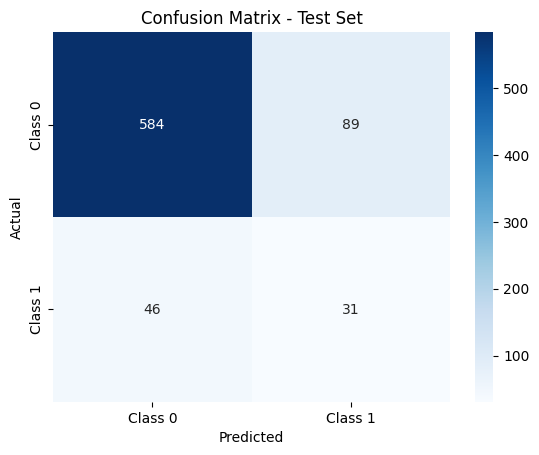

Test AUC ROC: 0.7742


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define hyperparameters
hidden_size1 = 128   # Size of the first hidden layer
hidden_size2 = 64    # Size of the second hidden layer
dropout = 0.2        # Dropout rate

# Define the model using nn.Sequential
def create_model():
    model = nn.Sequential(
        nn.Linear(X1_train_tensor.shape[1], hidden_size1),  # Input layer to first hidden layer
        nn.ReLU(),  # ReLU activation
        nn.Dropout(dropout),  # Dropout layer to prevent overfitting
        nn.Linear(hidden_size1, hidden_size2),  # First hidden layer to second hidden layer
        nn.ReLU(),  # ReLU activation
        nn.Dropout(dropout),  # Dropout layer to prevent overfitting
        nn.Linear(hidden_size2, 1),  # Second hidden layer to output layer
        nn.Sigmoid()  # Sigmoid activation for binary classification
    )
    return model

# Define optimizer (Adam)
optimizer = optim.Adam

# Function to train and evaluate the model without any weights
def train_and_evaluate(model, optimizer):
    # Recreate the model and move it to the device
    model = create_model().to(device)

    # Initialize optimizer
    optimizer = optimizer(model.parameters(), lr=0.001)

    # Define number of epochs for training
    epochs = 60
    batch_size = 64

    # Training loop
    for epoch in range(epochs):
        model.train()  # Set the model to training mode

        # Initialize variable for training accuracy tracking
        correct_train = 0
        total_train = 0

        # Mini-batch gradient descent
        for i in range(0, X1_train_tensor.shape[0], batch_size):
            # Get mini-batch
            batch_X = X1_train_tensor[i:i+batch_size].to(device)
            batch_y = y1_train_tensor[i:i+batch_size].to(device)

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(batch_X)

            # Compute loss
            criterion = nn.BCELoss()  # Using BCELoss without weight argument
            loss = criterion(outputs, batch_y)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Track accuracy for training
            predicted = (outputs > 0.5).float()  # Apply threshold of 0.5 to get binary predictions
            correct_train += (predicted == batch_y).sum().item()
            total_train += batch_y.size(0)

        # Calculate and print training accuracy
        train_accuracy = correct_train / total_train
        if (epoch + 1) % 5 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Training Accuracy: {train_accuracy:.4f}")

    # Evaluate the model on the test set
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        y1_test_pred_prob = model(X1_test_tensor.to(device)).cpu().numpy()  # Get the predicted probabilities
        y1_test_pred_bin = (y1_test_pred_prob > 0.5).astype(int)  # Convert probabilities to binary (0 or 1)

    # Calculate accuracy on test set
    test_accuracy = accuracy_score(y1_test_tensor.numpy(), y1_test_pred_bin.flatten())
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Print classification report for test set (Precision, Recall, F1 Score for both classes)
    print("Test Classification Report:")
    print(classification_report(y1_test_tensor.numpy(), y1_test_pred_bin.flatten(), target_names=["Class 0", "Class 1"]))

    # Confusion matrix for test set
    cm = confusion_matrix(y1_test_tensor.numpy(), y1_test_pred_bin.flatten())
    print("Confusion Matrix:")
    print(cm)

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Test Set')
    plt.show()

    # Calculate and print AUC ROC score
    auc_roc = roc_auc_score(y1_test_tensor.numpy(), y1_test_pred_prob.flatten())  # Using probabilities
    print(f"Test AUC ROC: {auc_roc:.4f}")

# Train and evaluate the model without weights
train_and_evaluate(create_model(), optimizer)


#TabNet


In [ ]:
!pip install pytorch-tabnet
from sklearn.preprocessing import LabelEncoder
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

In [ ]:
# Step 1: Encode categorical features
label_encoders = {}
cat_idxs = []
cat_dims = []

for col in categorical_cols:
    le = LabelEncoder()
    data_copy2[col] = le.fit_transform(data_copy2[col].astype(str))  # Ensure data is string for LabelEncoder
    label_encoders[col] = le
    cat_idxs.append(data_copy2.columns.get_loc(col))  # Store column index
    cat_dims.append(len(le.classes_))  # Store number of unique classes

In [ ]:
data_copy2

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadStroke,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeartConditionBinary
0,45,0,2,0.0,0.0,3,1,8.0,3,0,...,113.40,40.35,0,0,0,0,0,0,2,0
1,52,0,2,2.0,5.0,3,1,8.0,0,0,...,104.33,34.97,1,1,0,1,0,0,0,0
2,13,1,3,7.0,10.0,3,1,6.0,0,0,...,104.33,34.97,0,0,1,1,2,0,0,1
3,16,0,2,20.0,10.0,3,0,8.0,2,0,...,127.01,45.19,0,0,0,0,0,0,2,1
4,43,0,0,0.0,0.0,3,1,7.0,3,0,...,49.90,19.49,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,35,1,2,0.0,2.0,3,1,6.0,3,0,...,104.33,31.19,1,1,1,1,1,0,2,0
4996,33,0,0,0.0,0.0,3,1,7.0,0,0,...,63.50,24.80,1,0,1,0,2,0,0,0
4997,50,1,2,30.0,0.0,1,1,7.0,0,0,...,157.85,44.68,1,0,0,0,1,0,0,0
4998,33,0,4,3.0,2.0,3,1,7.0,3,0,...,49.90,17.23,1,1,0,0,2,0,2,0


In [ ]:
len(cat_idxs)

In [ ]:
target = "HeartConditionBinary"
features = [col for col in data_copy2.columns if col != target]

X = data_copy2[features].values
y = data_copy2[target].values

# Step 3: Train-Validation-Test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=10)

In [ ]:
np.shape(X)

(5000, 38)

In [ ]:
y

In [ ]:
np.shape(X_train)

(3500, 38)

In [ ]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (3500, 38) (3500,)
Validation set shape: (750, 38) (750,)
Test set shape: (750, 38) (750,)


In [ ]:
from sklearn.datasets import make_classification
from collections import Counter
class_counts_train_tab = Counter(y_train)
y_train_0 = class_counts_train_tab[0]
y_train_1 = class_counts_train_tab[1]

print(f"Class 0 count train: {y_train_0}")
print(f"Class 1 count train: {y_train_1}")


class_counts_test_tab = Counter(y_test)
y_test_0 = class_counts_test_tab[0]
y_test_1 = class_counts_test_tab[1]

print(f"Class 0 count test: {y_test_0}")
print(f"Class 1 count test: {y_test_1}")

class_counts_valid_tab = Counter(y_valid)
y_valid_0 = class_counts_valid_tab[0]
y_valid_1 = class_counts_valid_tab[1]

print(f"Class 0 count test: {y_valid_0}")
print(f"Class 1 count test: {y_valid_1}")

Class 0 count train: 3185
Class 1 count train: 315
Class 0 count test: 673
Class 1 count test: 77
Class 0 count test: 697
Class 1 count test: 53


In [ ]:
from imblearn.over_sampling import SMOTE

smote_tab = SMOTE(random_state=10)
Xst_train, yst_train = smote_tab.fit_resample(X_train, y_train)

print("After SMOTE with Tomek Links:")
print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(yst_train))

After SMOTE with Tomek Links:
Original class distribution: Counter({0: 3185, 1: 315})
Resampled class distribution: Counter({0: 3185, 1: 3185})


In [ ]:
print("Training set shape:", Xst_train.shape, yst_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (6370, 38) (6370,)
Validation set shape: (750, 38) (750,)
Test set shape: (750, 38) (750,)


In [ ]:
print(f"X_train: {type(Xst_train)}, dtype: {Xst_train.dtype}")
print(f"X_valid: {type(X_valid)}, dtype: {X_valid.dtype}")
print(f"y_train: {type(yst_train)}, dtype: {yst_train.dtype}")
print(f"y_valid: {type(y_valid)}, dtype: {y_valid.dtype}")
print(f"X_test: {type(X_test)}, dtype: {X_test.dtype}")
print(f"y_test: {type(y_test)}, dtype: {y_test.dtype}")

X_train: <class 'numpy.ndarray'>, dtype: float64
X_valid: <class 'numpy.ndarray'>, dtype: float64
y_train: <class 'numpy.ndarray'>, dtype: int64
y_valid: <class 'numpy.ndarray'>, dtype: int64
X_test: <class 'numpy.ndarray'>, dtype: float64
y_test: <class 'numpy.ndarray'>, dtype: int64


In [ ]:
# TabNet parameters
tabnet_params = {
    "cat_idxs": cat_idxs,
    "cat_dims": cat_dims,
    "cat_emb_dim": 2,  # Embedding dimension for categorical features
    "optimizer_fn": torch.optim.Adam,
    "optimizer_params": dict(lr=2e-2),
    "scheduler_params": {"step_size": 50, "gamma": 0.9},
    "scheduler_fn": torch.optim.lr_scheduler.StepLR,
    "mask_type": "entmax",  # Use 'entmax' for sparse attention
    "device_name": "cuda" if torch.cuda.is_available() else "cpu",
}

# Initialize TabNet Classifier
clf = TabNetClassifier(**tabnet_params)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Initialize an empty list to store results
results = []

# Train the model without class weights (using the original training set)
clf.fit(
    X_train=Xst_train,
    y_train=yst_train,
    eval_set=[(Xst_train, yst_train), (X_valid, y_valid)],
    eval_name=["train", "valid"],
    eval_metric=["auc"],
    max_epochs=100,  # Train for 100 epochs
    patience=15,  # Allow early stopping after 15 epochs without improvement
    batch_size=512,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
)

# Generate predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score for both classes (0 and 1)
precision_class_0 = precision_score(y_test, y_pred, pos_label=0)
recall_class_0 = recall_score(y_test, y_pred, pos_label=0)
f1_class_0 = f1_score(y_test, y_pred, pos_label=0)

precision_class_1 = precision_score(y_test, y_pred, pos_label=1)
recall_class_1 = recall_score(y_test, y_pred, pos_label=1)
f1_class_1 = f1_score(y_test, y_pred, pos_label=1)

# AUC-ROC score
auc_score = roc_auc_score(y_test, y_prob)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Training accuracy
y_train_pred = clf.predict(Xst_train)
train_accuracy = accuracy_score(yst_train, y_train_pred)

# Store the results
results.append({
    'Test Accuracy': test_accuracy,
    'Train Accuracy': train_accuracy,
    'Precision (Class 0)': precision_class_0,
    'Recall (Class 0)': recall_class_0,
    'F1 Score (Class 0)': f1_class_0,
    'Precision (Class 1)': precision_class_1,
    'Recall (Class 1)': recall_class_1,
    'F1 Score (Class 1)': f1_class_1,
    'AUC-ROC Score': auc_score
})

# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Display the table
print(results_df)

epoch 0  | loss: 0.69568 | train_auc: 0.55985 | valid_auc: 0.54361 |  0:00:01s
epoch 1  | loss: 0.5527  | train_auc: 0.69246 | valid_auc: 0.66817 |  0:00:02s
epoch 2  | loss: 0.49193 | train_auc: 0.80852 | valid_auc: 0.62502 |  0:00:03s
epoch 3  | loss: 0.42055 | train_auc: 0.85353 | valid_auc: 0.60063 |  0:00:04s
epoch 4  | loss: 0.37551 | train_auc: 0.88612 | valid_auc: 0.60261 |  0:00:06s
epoch 5  | loss: 0.33542 | train_auc: 0.91192 | valid_auc: 0.63693 |  0:00:07s
epoch 6  | loss: 0.30502 | train_auc: 0.92467 | valid_auc: 0.66801 |  0:00:08s
epoch 7  | loss: 0.28435 | train_auc: 0.93029 | valid_auc: 0.66549 |  0:00:09s
epoch 8  | loss: 0.27026 | train_auc: 0.93872 | valid_auc: 0.67278 |  0:00:10s
epoch 9  | loss: 0.25927 | train_auc: 0.94156 | valid_auc: 0.66812 |  0:00:11s
epoch 10 | loss: 0.25474 | train_auc: 0.94466 | valid_auc: 0.6845  |  0:00:12s
epoch 11 | loss: 0.24791 | train_auc: 0.95259 | valid_auc: 0.6829  |  0:00:12s
epoch 12 | loss: 0.23692 | train_auc: 0.95209 | vali

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


   Test Accuracy  Train Accuracy  Precision (Class 0)  Recall (Class 0)  \
0       0.838667        0.952276              0.93125          0.885587   

   F1 Score (Class 0)  Precision (Class 1)  Recall (Class 1)  \
0            0.907845                  0.3          0.428571   

   F1 Score (Class 1)  AUC-ROC Score  
0            0.352941       0.739719  
